### Objectives
- Explore numeric and categorical features
- Identify relationships with churn
- Compute feature importance
- Generate insights for business decisions


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load prepared training data
X_train = pd.read_csv('../data/X_train_prepared.csv')
y_train = pd.read_csv('../data/y_train.csv')
Customer_Churn_original_numeric = pd.read_csv(r'D:\Bank_Churn_Project\data\Customer_Churn_original_numeric.csv')

In [3]:
# Display first few rows
X_train.head()
y_train.head()

,Exited
0,0
1,0
2,1
3,1
4,1


### Numeric Feature Exploration

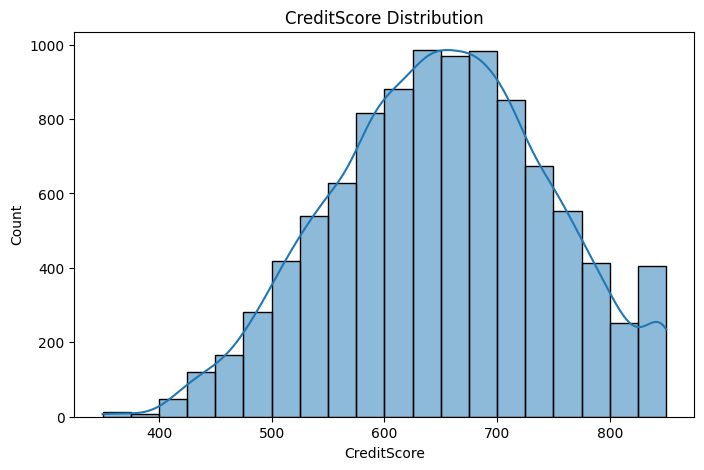

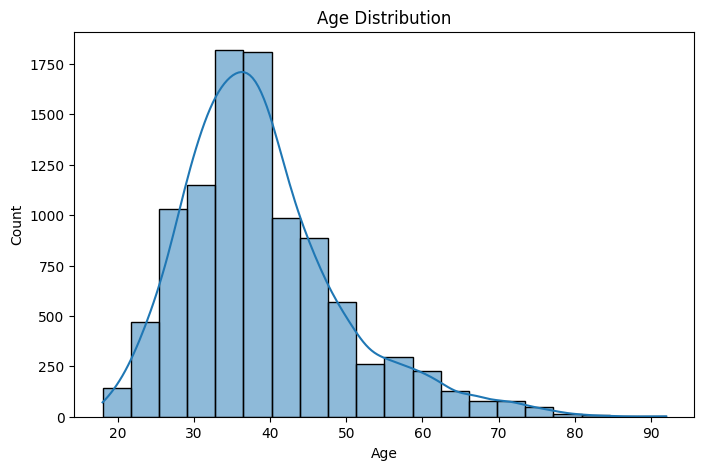

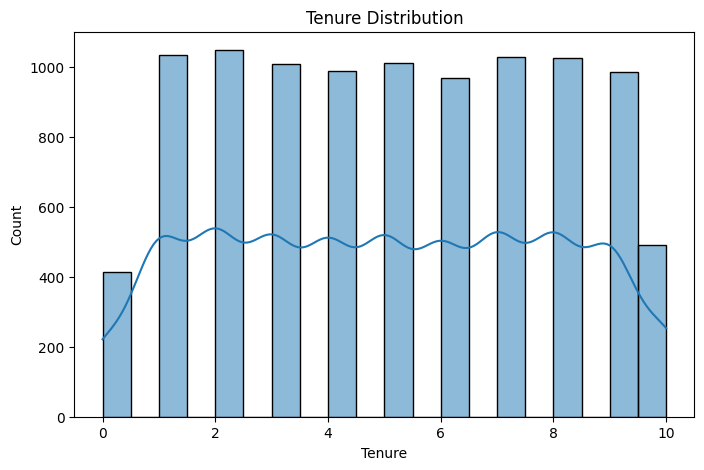

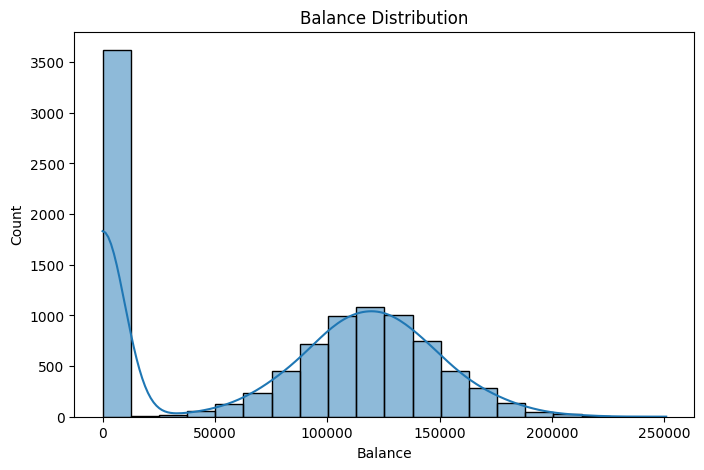

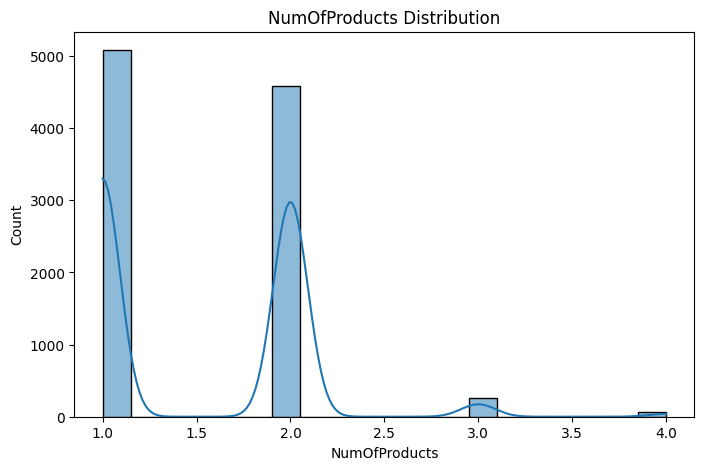

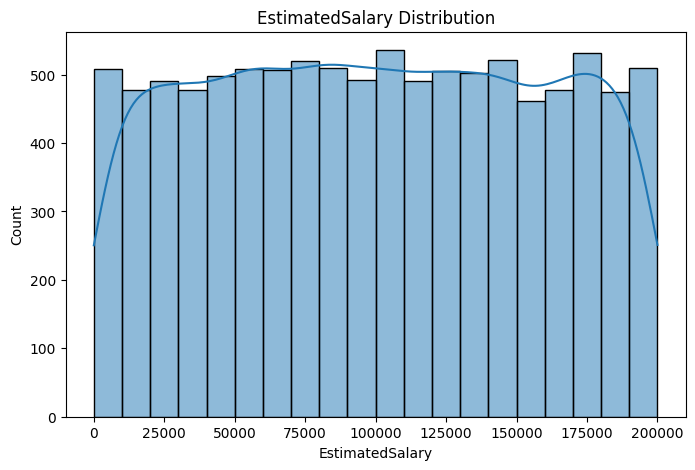

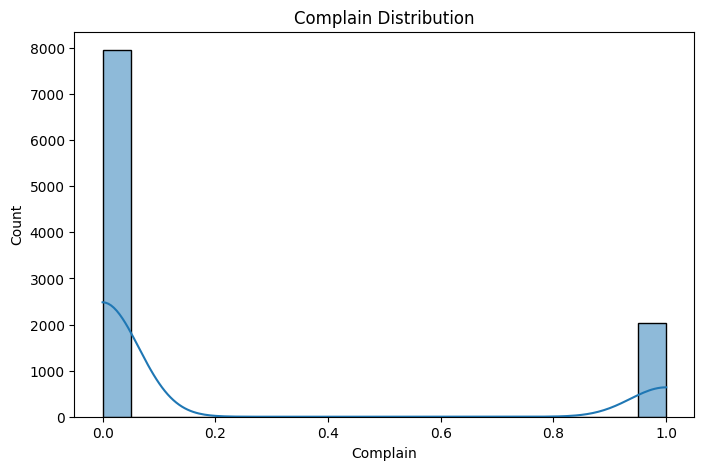

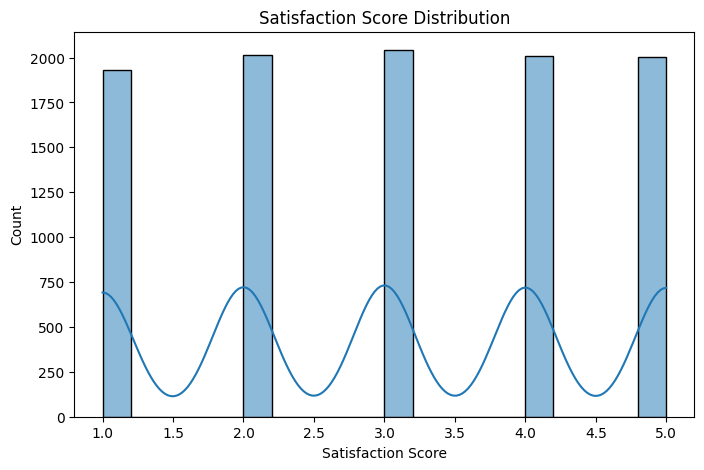

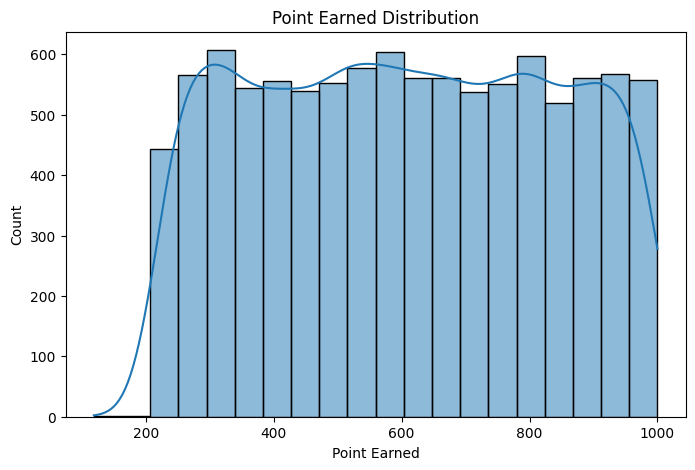

In [5]:

numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(Customer_Churn_original_numeric[col], bins=20, kde=True)  # <-- use original data
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'../plots/hist_{col.lower().replace(" ","_")}.png')
    plt.show()


**Insights:**  
- `Age`: majority of customers 30–45  
- `Balance`: bimodal, spikes at 0 and high balances  
- `NumOfProducts`: mostly 1–2 products  
- `Complain` & `Satisfaction Score`: indicate customer dissatisfaction; may correlate with churn  
- `Point Earned` & `EstimatedSalary`: reflect engagement and financial standing

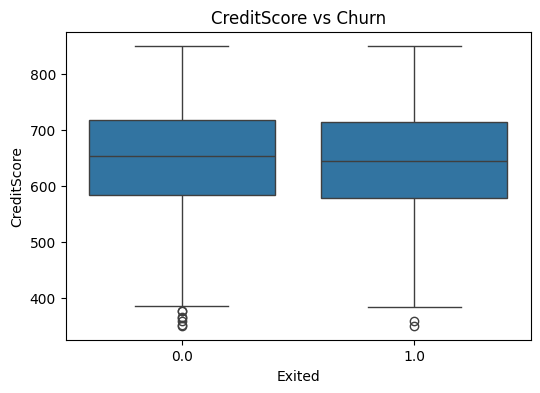

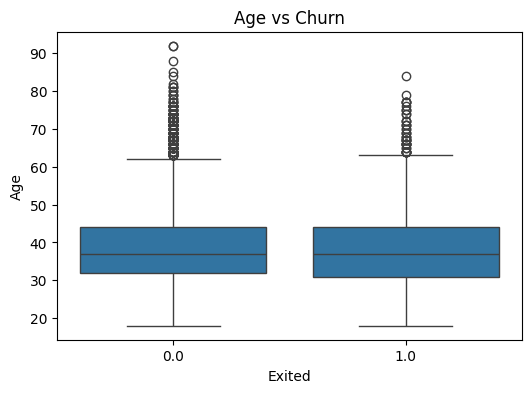

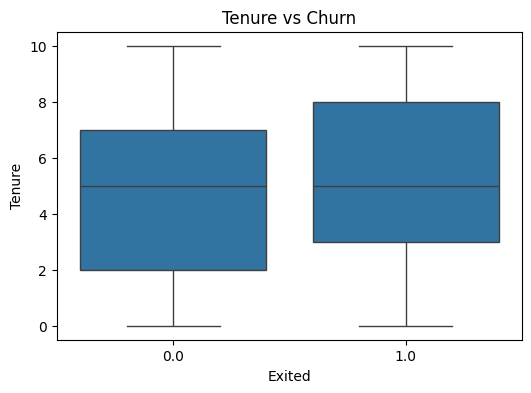

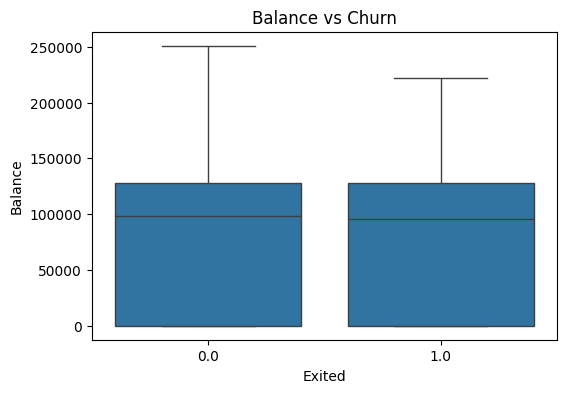

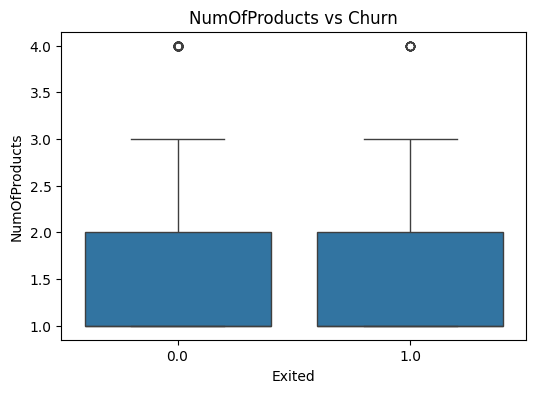

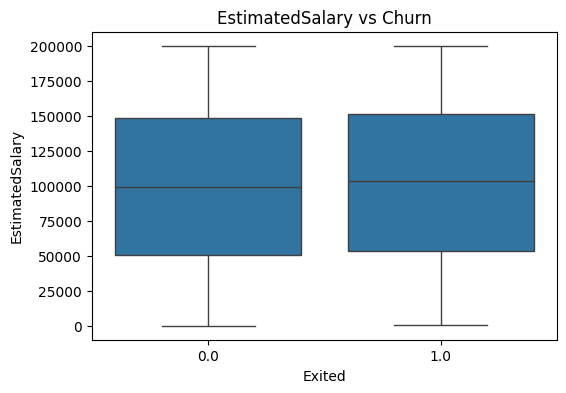

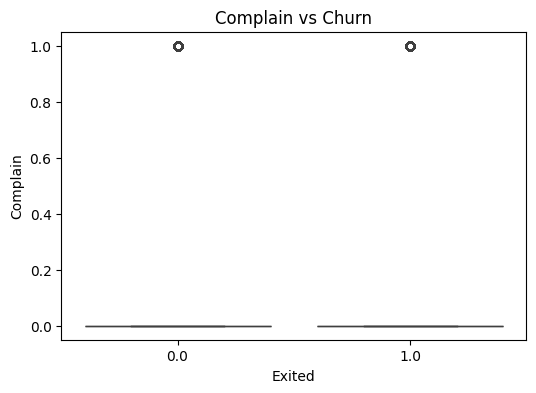

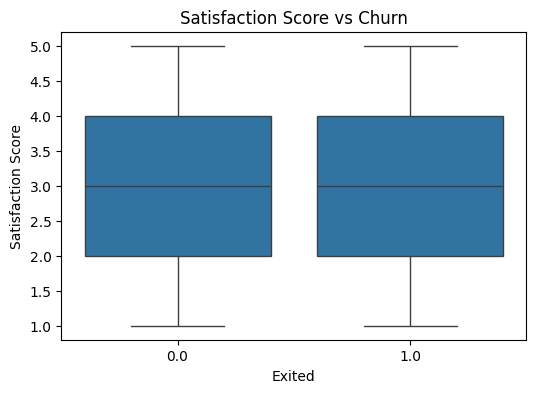

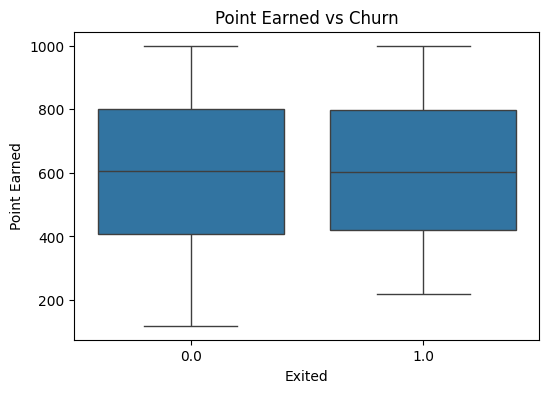

In [8]:
# Boxplots: Numeric vs Churn
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y_train['Exited'], y=Customer_Churn_original_numeric[col])
    plt.title(f'{col} vs Churn')
    plt.savefig(f'../plots/boxplot_{col.lower().replace(" ","_")}.png')
    plt.show()

**Insights:**  
- Older customers tend to churn more  
- Higher balances slightly reduce churn  
- Higher complaints → higher churn  
- Lower satisfaction score → higher churn  
- Number of products and points earned can also influence churn

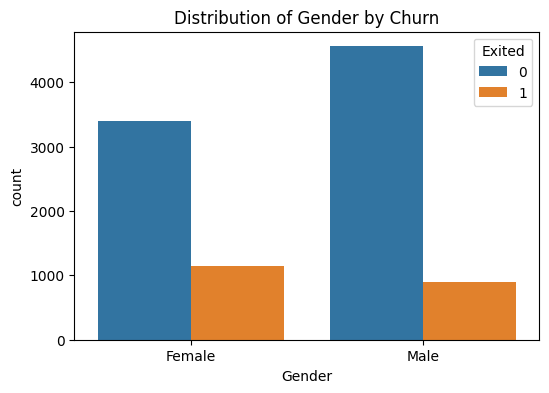

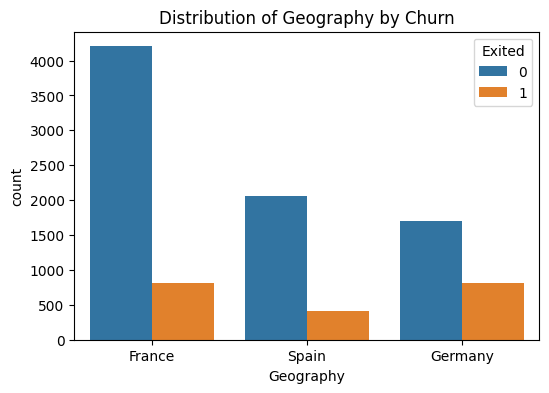

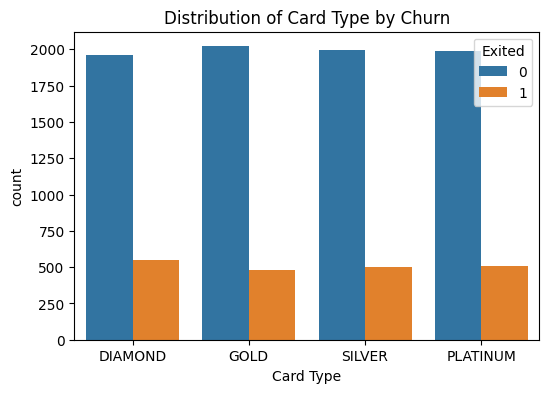

In [17]:
# Categorical vs Churn
Customer_Churn = pd.read_csv(r'D:\Bank_Churn_Project\data\Customer-Churn-Records.csv')
categorical_cols = ['Gender', 'Geography', 'Card Type']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=Customer_Churn)
    plt.title(f'Distribution of {col} by Churn')
    plt.savefig(f'../plots/count_{col.lower().replace(" ","_")}.png')
    plt.show()

### Categorical Features vs Churn Insights
- Gender: Both male and female customers show similar churn, males slightly higher.
- Geography: Spain has highest churn, Germany lowest → focus retention on high-risk countries.
- Membership Activity: Inactive members have significantly higher churn → engagement is key.

### Correlation Analysis

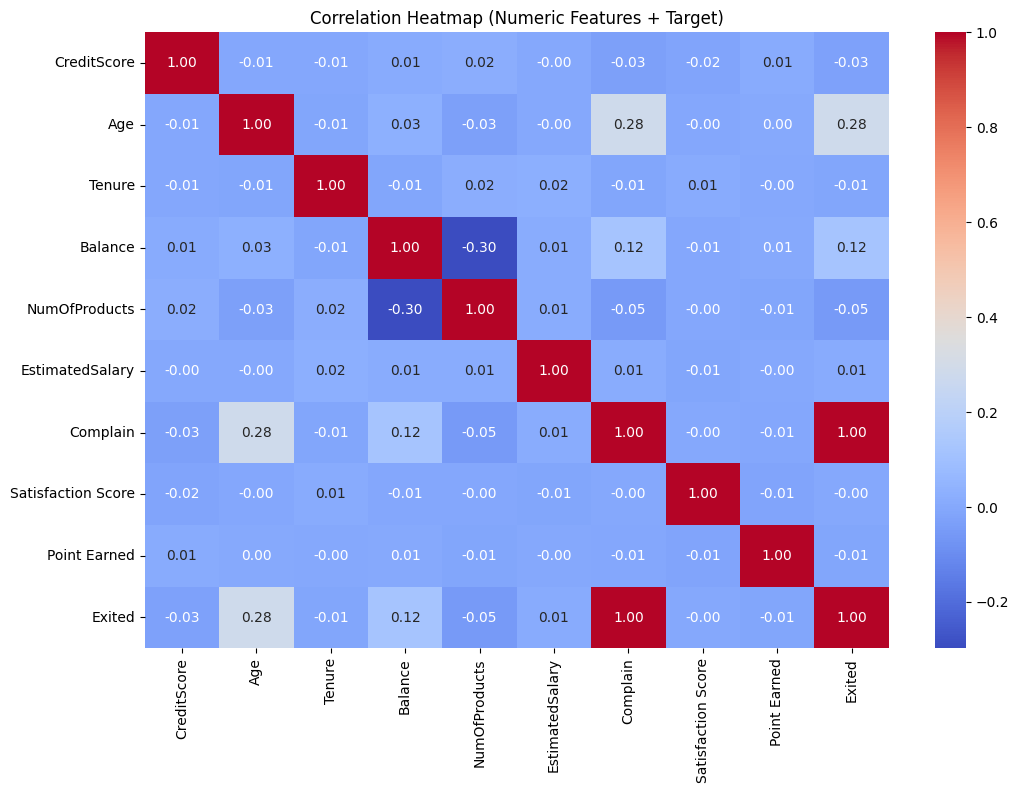

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train[numeric_cols].join(y_train).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features + Target)")
plt.savefig('../plots/correlation_heatmap.png')
plt.show()

**Insights:**  
- `Age`, `Balance`, `CreditScore`, `Satisfaction Score`, `Complain` correlate with `Exited`  
- Helps select important features for modeling

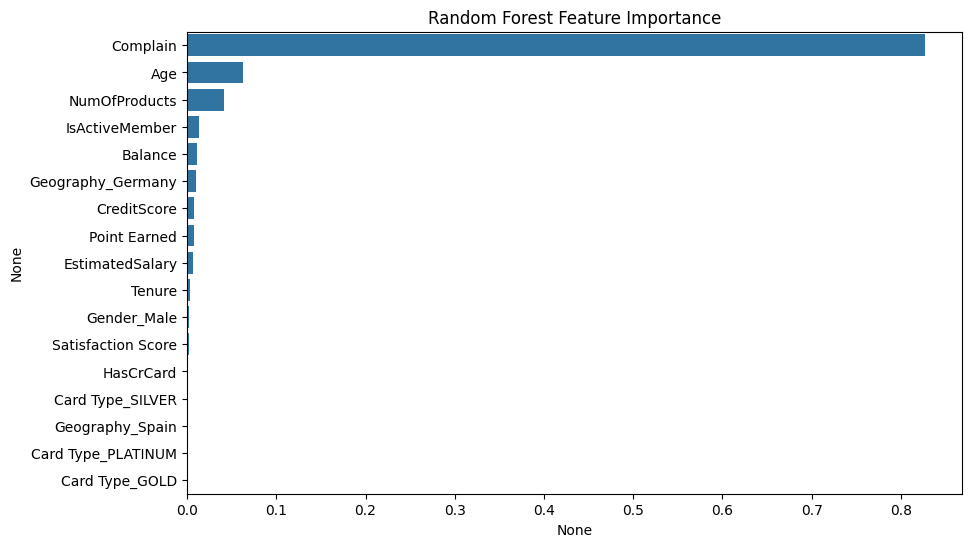

In [11]:
# Train RandomForest on training set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train.values.ravel())

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.savefig('../plots/train_randamforest.png')
plt.show()

**Insights:**  
- Most important features: `Balance`, `Age`, `CreditScore`, `Satisfaction Score`, `Complain`  
- Model can focus on these features for better churn prediction  
- Business can prioritize retention strategies for high-risk customers

In [13]:
# Save updated datasets for Step 4
X_train.to_csv('../data/X_train_eda.csv', index=False)
X_test.to_csv('../data/X_test_eda.csv', index=False)